In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from scipy.optimize import fmin

from sympy import *

# Questão 1

In [2]:
M = np.matrix('0.50 0.25 0.25; 0.25 0.50 0.25; 0.25 0.25 0.50')
M

matrix([[0.5 , 0.25, 0.25],
        [0.25, 0.5 , 0.25],
        [0.25, 0.25, 0.5 ]])

In [3]:
autovalores,autovetores = np.linalg.eig(M)

autovalores

array([0.25, 1.  , 0.25])

In [4]:
vetor_pi = autovetores[:,1]/np.sum(autovetores[:,1])
vetor_pi

matrix([[0.33333333],
        [0.33333333],
        [0.33333333]])

### Item (a)

In [5]:
p_zero = np.vstack(np.array([0.3, 0.4, 0.3]))

# Calcular a distribuição de probabilidade X(3)
p_um = M*p_zero
p_dois = M*p_um
p_tres = M*p_dois
print(f'soma das probabilidades em X(3): {np.sum(p_tres)}')
p_tres

soma das probabilidades em X(3): 1.0


matrix([[0.3328125],
        [0.334375 ],
        [0.3328125]])

### Item (b)

In [6]:
M = np.matrix('0.50 0.25 0.25; 0.25 0.50 0.25; 0.25 0.25 0.50')
estado_atual = 1
tempos_possiveis = np.array([1, 2, 3])
soma_coluna = 0

iterador = 0

for t in tempos_possiveis:
    uniforme_sorteado = np.random.uniform(0,1)
    while uniforme_sorteado > soma_coluna:
        soma_coluna = soma_coluna + M[estado_atual,iterador]
        iterador += 1
    print(f'No tempo {t} => Mudança de estado: de {estado_atual} para {iterador}. Uniforme sorteado foi {uniforme_sorteado:.3}.')
    estado_atual = iterador

No tempo 1 => Mudança de estado: de 1 para 2. Uniforme sorteado foi 0.524.
No tempo 2 => Mudança de estado: de 2 para 2. Uniforme sorteado foi 0.201.
No tempo 3 => Mudança de estado: de 2 para 2. Uniforme sorteado foi 0.221.


### Item (c)

In [38]:
numero_iteracoes = 10**5
escolhas = np.random.choice(3, numero_iteracoes)
M = np.matrix('0.50 0.25 0.25; 0.25 0.50 0.25; 0.25 0.25 0.50')
tempos_possiveis = np.array([0, 1, 2, 3])
qtd_tempos = len(tempos_possiveis)
X = np.zeros((numero_iteracoes,qtd_tempos))


for iteracoes in range(0,numero_iteracoes):
    soma_coluna = 0
    iterador = 0
    estado_inicial = escolhas[iteracoes]
    estado_atual = estado_inicial
    
    for t in tempos_possiveis:
        X[iteracoes,t] = estado_atual
        uniforme_sorteado = np.random.uniform(0,1)
        while uniforme_sorteado > soma_coluna:
            soma_coluna = soma_coluna + M[estado_atual,iterador]
            iterador += 1
        estado_atual = iterador

In [36]:
X

array([[2., 2., 2., 2.],
       [0., 1., 1., 2.],
       [1., 2., 2., 2.],
       ...,
       [0., 1., 1., 1.],
       [2., 3., 3., 3.],
       [0., 1., 2., 2.]])

### Item (d)

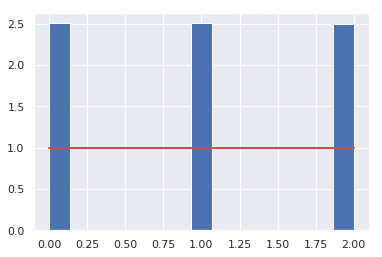

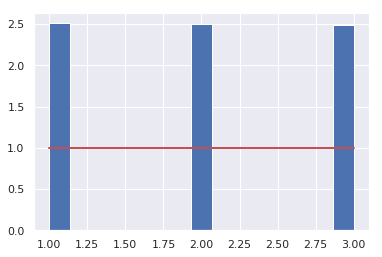

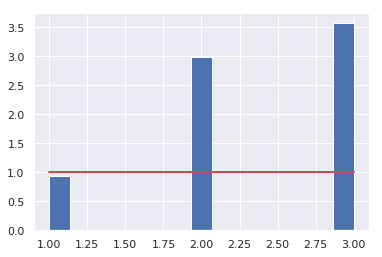

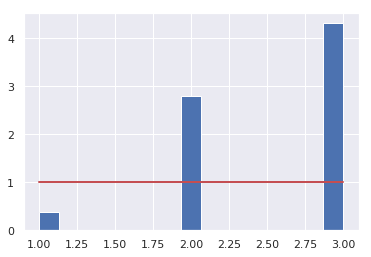

In [42]:
count, bins, ignored = plt.hist(X[:,0], 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.savefig('t_zero.eps',format='eps')
plt.show()
count, bins, ignored = plt.hist(X[:,1], 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.savefig('t_um.eps',format='eps')
plt.show()
count, bins, ignored = plt.hist(X[:,2], 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.savefig('t_dois.eps',format='eps')
plt.show()
count, bins, ignored = plt.hist(X[:,3], 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.savefig('t_tres.eps',format='eps')
plt.show()

# Questão 2

In [9]:
# estados possíveis
estados_possiveis = np.array([1, 2, 3, 4, 5])
energias_possiveis = np.array([0.5, 0.2, 0.3, 0.1, 0.4])

### Item (a)

In [10]:
# estados possíveis
estados_possiveis = np.array([1, 2, 3, 4, 5])
energias_possiveis = np.array([0.5, 0.2, 0.3, 0.1, 0.4])
temperatura = 0.1

#A matriz de transição M, que será 5x5
M = np.zeros((5,5))
qtd_estados_possiveis = len(estados_possiveis)

for iterador_fora in range(0,qtd_estados_possiveis):
    for iterador_dentro in range(0,qtd_estados_possiveis):
        delta_J = energias_possiveis[iterador_fora] - energias_possiveis[iterador_dentro]
        
        if (delta_J > 0):
            M[iterador_dentro,iterador_fora] = 1/qtd_estados_possiveis
        else:
            if iterador_dentro == iterador_fora:
                M[iterador_dentro,iterador_fora] =  M[iterador_fora,iterador_fora] + 1/(qtd_estados_possiveis)*(np.exp(delta_J/temperatura))
                M[iterador_fora,iterador_fora] =  M[iterador_fora,iterador_fora] + 1/(qtd_estados_possiveis)*((1 - np.exp(delta_J/temperatura)))
            else:
                M[iterador_dentro,iterador_fora] = 1/(qtd_estados_possiveis)*(np.exp(delta_J/temperatura))
                M[iterador_fora,iterador_fora] =  M[iterador_fora,iterador_fora] + 1/(qtd_estados_possiveis)*((1 - np.exp(delta_J/temperatura)))
M

array([[0.2       , 0.00995741, 0.02706706, 0.00366313, 0.07357589],
       [0.2       , 0.68939964, 0.2       , 0.07357589, 0.2       ],
       [0.2       , 0.07357589, 0.49935706, 0.02706706, 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.88573651, 0.2       ],
       [0.2       , 0.02706706, 0.07357589, 0.00995741, 0.32642411]])

### Item (b)

In [11]:
M

array([[0.2       , 0.00995741, 0.02706706, 0.00366313, 0.07357589],
       [0.2       , 0.68939964, 0.2       , 0.07357589, 0.2       ],
       [0.2       , 0.07357589, 0.49935706, 0.02706706, 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.88573651, 0.2       ],
       [0.2       , 0.02706706, 0.07357589, 0.00995741, 0.32642411]])

In [12]:
estado_atual = 1
tempos_possiveis = np.array([1, 2, 3, 4])
soma_coluna = 0

iterador = 0

for t in tempos_possiveis:
    uniforme_sorteado = np.random.uniform(0,1)
    while uniforme_sorteado > soma_coluna:
        soma_coluna = soma_coluna + M[estado_atual,iterador]
        iterador += 1
    print(f'No tempo {t} => Mudança de estado: de {estado_atual} para {iterador}. Uniforme sorteado foi {uniforme_sorteado:.3}.')
    estado_atual = iterador

No tempo 1 => Mudança de estado: de 1 para 2. Uniforme sorteado foi 0.841.
No tempo 2 => Mudança de estado: de 2 para 2. Uniforme sorteado foi 0.215.
No tempo 3 => Mudança de estado: de 2 para 2. Uniforme sorteado foi 0.107.
No tempo 4 => Mudança de estado: de 2 para 2. Uniforme sorteado foi 0.288.


### Item (c)

In [13]:
autovalores,autovetores = np.linalg.eig(M)

In [14]:
vetor_pi = autovetores[:,0]/np.sum(autovetores[:,0])
vetor_pi

array([0.01165623, 0.23412166, 0.08612854, 0.63640865, 0.03168492])

### Item (d)

In [15]:
fatores_boltzmann = np.exp(-energias_possiveis/temperatura)

outro_vetor_pi = fatores_boltzmann/np.sum(fatores_boltzmann)
outro_vetor_pi

array([0.01165623, 0.23412166, 0.08612854, 0.63640865, 0.03168492])

### Item (e)

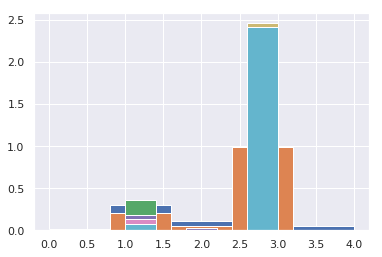

In [16]:
temperaturas = np.array([0.1, 0.0631, 0.05, 0.0431, 0.0387, 0.0356, 0.0333, 0.0315, 0.0301, 0.0289])
qtd_temperaturas = len(temperaturas)
total_iteracoes = 1000
estados_possiveis = np.array([0, 1, 2, 3, 4])
qtd_estados_possiveis = len(estados_possiveis)
energias_possiveis = np.array([0.5, 0.2, 0.3, 0.1, 0.4])

histogram_matrix = np.zeros((qtd_estados_possiveis,qtd_temperaturas))
estado_inicial = np.random.choice(qtd_estados_possiveis)
estado_atual = estado_inicial
J_inicial = energias_possiveis[estado_inicial]
J_atual = J_inicial

todos_J = np.zeros((total_iteracoes,qtd_temperaturas))
todos_estados = np.zeros((total_iteracoes,qtd_temperaturas))

for iterador_fora in range(0,qtd_temperaturas):
    for iterador_dentro in range(0,total_iteracoes):
        estado_possivel = np.random.choice(qtd_estados_possiveis)
        J = energias_possiveis[estado_possivel]
        r = np.random.uniform(0,1)
        if (r <  np.exp((J_atual-J)/temperaturas[iterador_fora])):
            estado_atual = estado_possivel
            J_atual = J
        todos_estados[iterador_dentro,iterador_fora] = estado_atual
        todos_J[iterador_dentro,iterador_fora] = J_atual
    histogram_matrix[:,iterador_fora], binq, outroq =  plt.hist(todos_estados[:,iterador_fora], qtd_estados_possiveis, density=True)   
    histogram_matrix[:,iterador_fora] = histogram_matrix[:,iterador_fora] / np.sum(histogram_matrix[:,iterador_fora] )

In [17]:
histogram_matrix

array([[0.017, 0.001, 0.146, 0.073, 0.075, 0.043, 0.056, 0.022, 0.015,
        0.031],
       [0.24 , 0.168, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.091, 0.037, 0.012, 0.011, 0.013, 0.001, 0.002, 0.   , 0.   ,
        0.   ],
       [0.613, 0.792, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.039, 0.002, 0.842, 0.916, 0.912, 0.956, 0.942, 0.978, 0.985,
        0.969]])

# Questão 3

A função escolhida:
$$f(\mathbf{x}) = $$

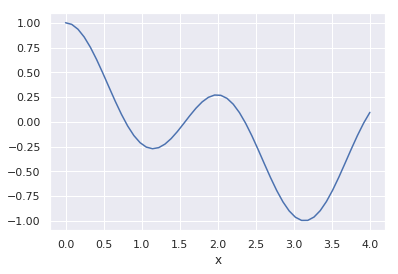

In [18]:
# Plot da função J
pt_inicial = 0
pt_final = 4
x = np.linspace(pt_inicial, pt_final)

y = np.cos(x)*np.cos(2*x)
sns.lineplot(x,y)
plt.xlabel('x')
plt.savefig('cos.eps',format='eps')
plt.show()

In [19]:
from scipy import optimize

def chosen_function(x):
    return np.cos(x)*np.cos(2*x)

pt_inicial = np.random.uniform(0,4)
optimize.fmin(chosen_function,pt_inicial)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 16
         Function evaluations: 32


array([3.1415637])

In [20]:
J_inicial = chosen_function(pt_inicial)
pt_atual = pt_inicial
J_atual = J_inicial

# Parâmetros utilizados
N = 100
K = 8
T_inicial = 5e-1
T = T_inicial
epsilon = 10e-2

fim = 0
n = 0
k = 1
J_min = J_atual
pt_min = pt_atual

while not(fim):
    n = n + 1
    pt = pt_atual + epsilon*(np.random.normal(0, 1))
    J = chosen_function(pt)
    todos_J = np.append(todos_J,J)
    if (np.random.uniform(0,1) < np.exp((J_atual-J)/T)):
        pt_atual = pt
        J_atual = J
    if (J < J_min):
        J_min = J
        pt_min = pt
    if (n % N == 0):
        k = k + 1
        T = T_inicial/(np.log(1+k))
        if k == K:
            fim = 1
pt_min

3.142919334584406